# Part 0: Set-up

In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.8 MB/s eta 0:00:00


In [2]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-PS2-Explaination-Xintong/main/data/literature.csv")
df

Title  \
0                Assistive technology in elderly care   
1   Demographics and Trends in Wheeled Mobility Eq...   
2   The right to assistive technology: for whom, f...   
3   Outcomes of assistive technology use on qualit...   
4   Factors Associated With the Use of Standardize...   
5   Universal Design and Assistive Technology in C...   
6   The Design of an Interactive Assistive Kitchen...   
7   Managing Input During Assistive Technology Pro...   
8   Assistive Technology for Individuals with Disa...   
9   Integrating medical, assistive, and universal ...   
10  A Survey of Assistive Technology Applications ...   
11  Assistive Technology Applications in Education...   
12  The acceptability of assistive technology to o...   
13         Computer vision for assistive technologies   
14  Surveying Wearable Human Assistive Technology ...   
15  Non-use of provided assistive technology devic...   

                                             Abstract  
0   New developments in assistive technology are l...  
1   This article presents a profile of household-r...  
2   Despite its facilitating role in creating oppo...  
3   The results from many research efforts on the ...  
4   This study investigated self-reported prevalen...  
5   Universal design and assistive technology pres...  
6   As the world's elderly population drastically ...  
7   Many different sources of input are available ...  
8   Despite the emphasis on technology and the rap...  
9   Introduction: ISO26000 provides guidance on ef...  
10  The Analysis of Technology Assistance for Chil...  
11  Results are reported of a two-year case study ...  
12  Assistive technology (AT) is defined in this p...  
13  In the last decades there has been a tremendou...  
14  In this survey a new application paradigm life...  
15  Over the years, several studies have been perf...

# Part I The World Cloud

## 1.1. Title

In [5]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Assistive technology in elderly care,Demographics and Trends in Wheeled Mobility Equipment Use and Accessibility in the Community,The right to assistive technology: for whom, for what, and by whom?,Outcomes of assistive technology use on quality of life,Factors Associated With the Use of Standardized Power Mobility,Universal Design and Assistive Technology in Communication and Information Technologies: Alternatives or Complements?,The Design of an Interactive Assistive Kitchen System,Managing Input During Assistive Technology Product Design,Assistive Technology for Individuals with Disabilities: A Review and Synthesis of the Literature,Integrating medical, assistive, and universal design products and technologies: Assistive Technology Service Method (ATSM),A Survey of Assistive Technology Applications in Schools and Recommendations for Practice,Assistive Technology Applications in Educational Programs of Children with Multiple Disabilities: A Case Study Report on the State of the Prac

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
stop_words = stopwords.words('english')
stop_words.extend([',',"assistive","technology","technologies",":","A","on","in","into","the","for","Assistive","Technology","use"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

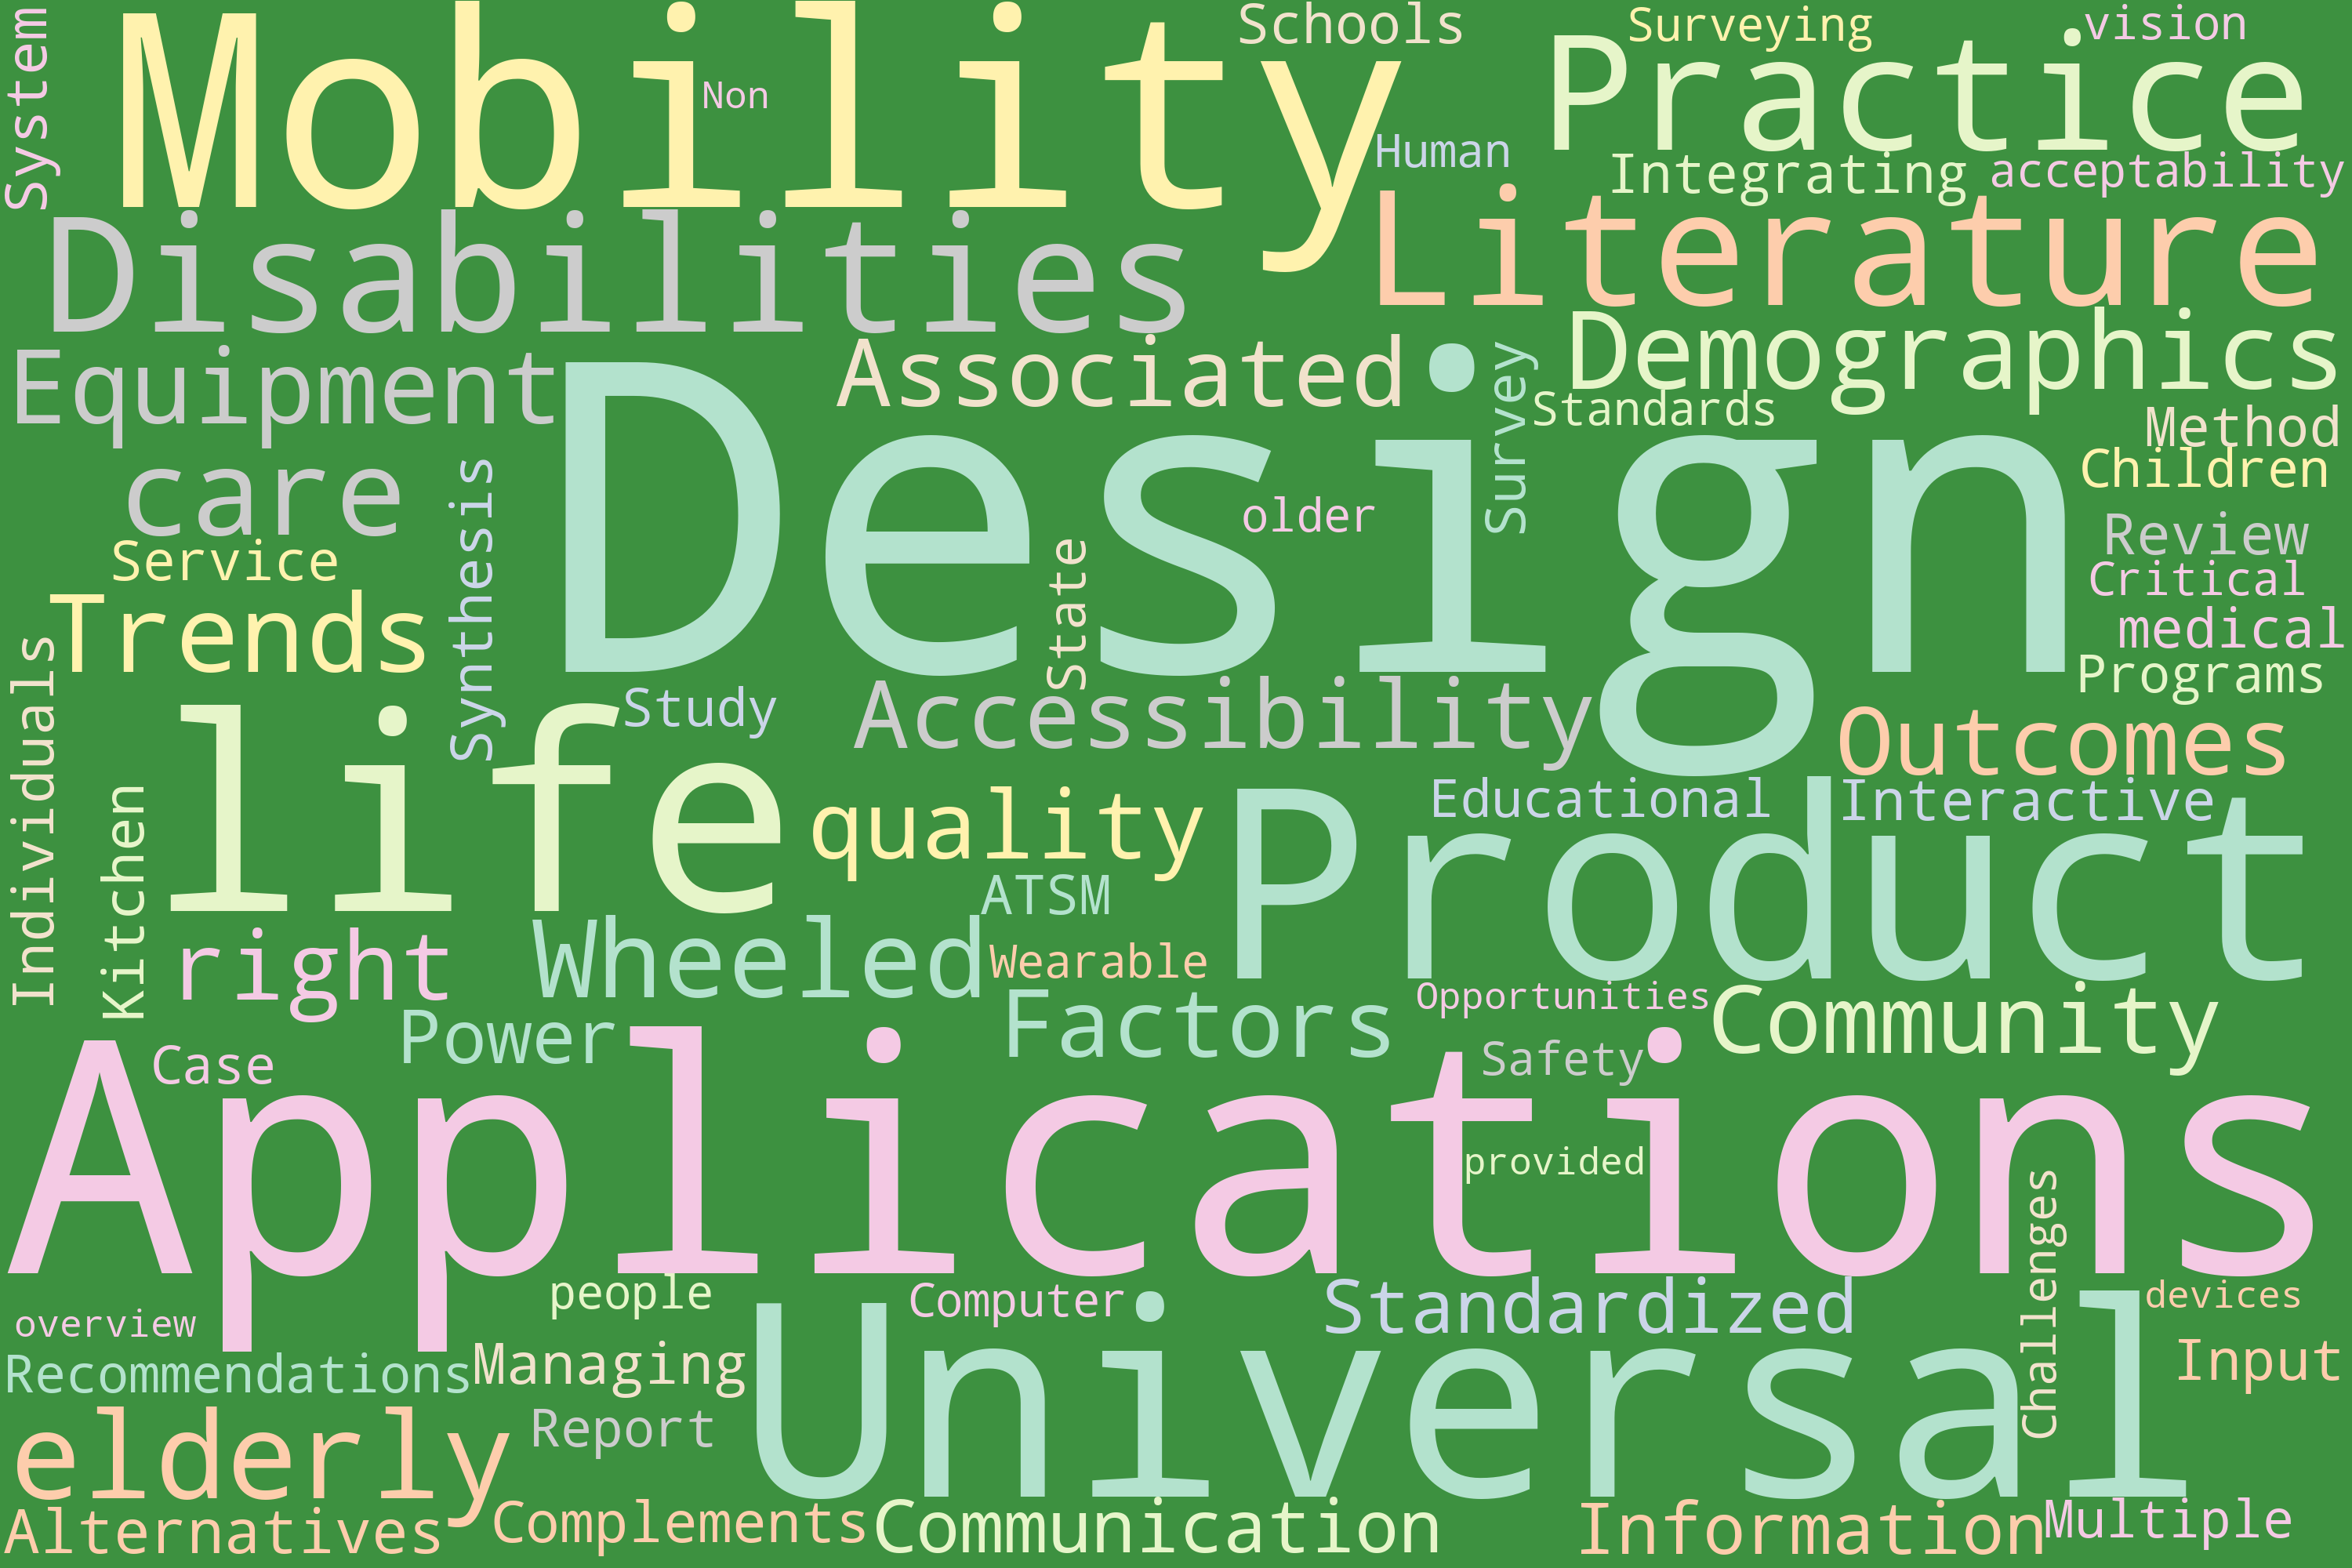

In [14]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

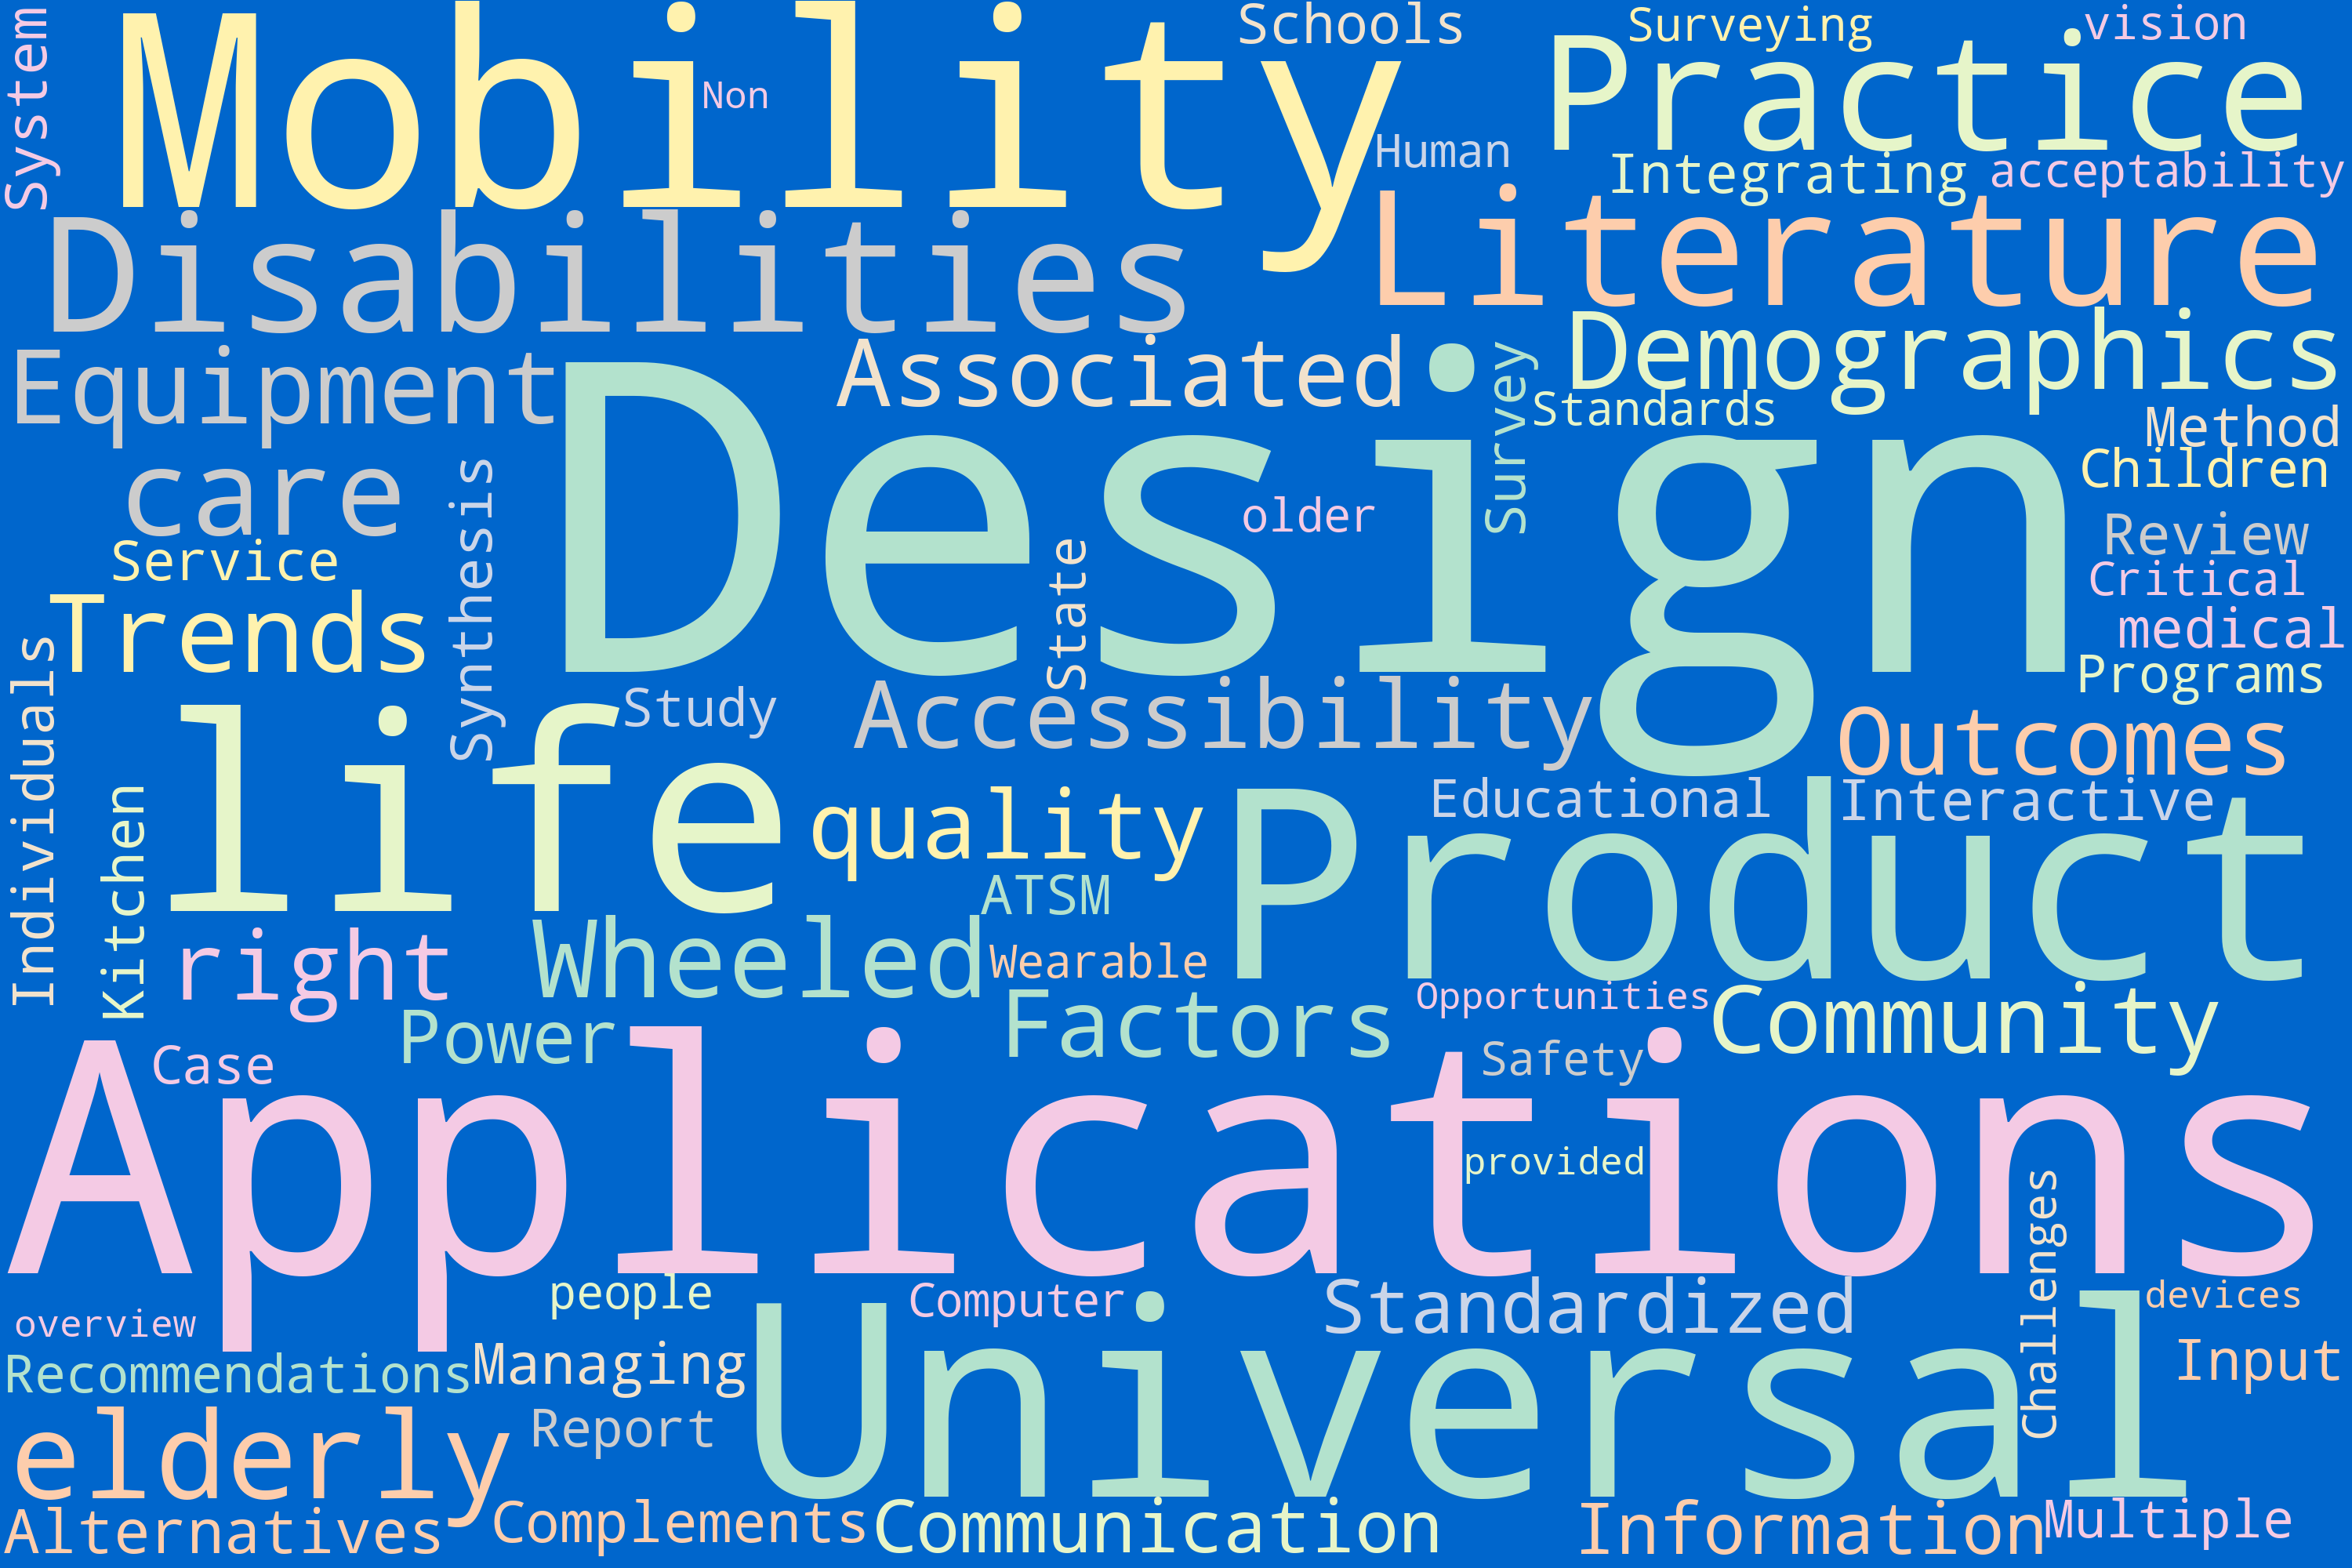

In [15]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [16]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"New developments in assistive technology are likely to make an important contribution to the care of elderly people in institutions and at home. Video‐monitoring, remote health monitoring, electronic sensors and equipment such as fall detectors, door monitors, bed alerts, pressure mats and smoke and heat alarms can improve older people's safety, security and ability to cope at home. Care at home is often preferable to patients and is usually less expensive for care providers than institutional alternatives.,This article presents a profile of household-resident U.S. adults using wheeled mobility equipment (WME) in 2005, trends in WME use from 1990 to 2005, and data on accessibility features and problems from 1994–97. Data were obtained from the Survey of Income and Program Participation (SIPP) and the National Health Interview Survey on Disability (NHIS-D). Compared to the general population, WME users are more likely to be older, female, and in poor health. Forty-four percent are work

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['.',"assistive","technology","technologies","use"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

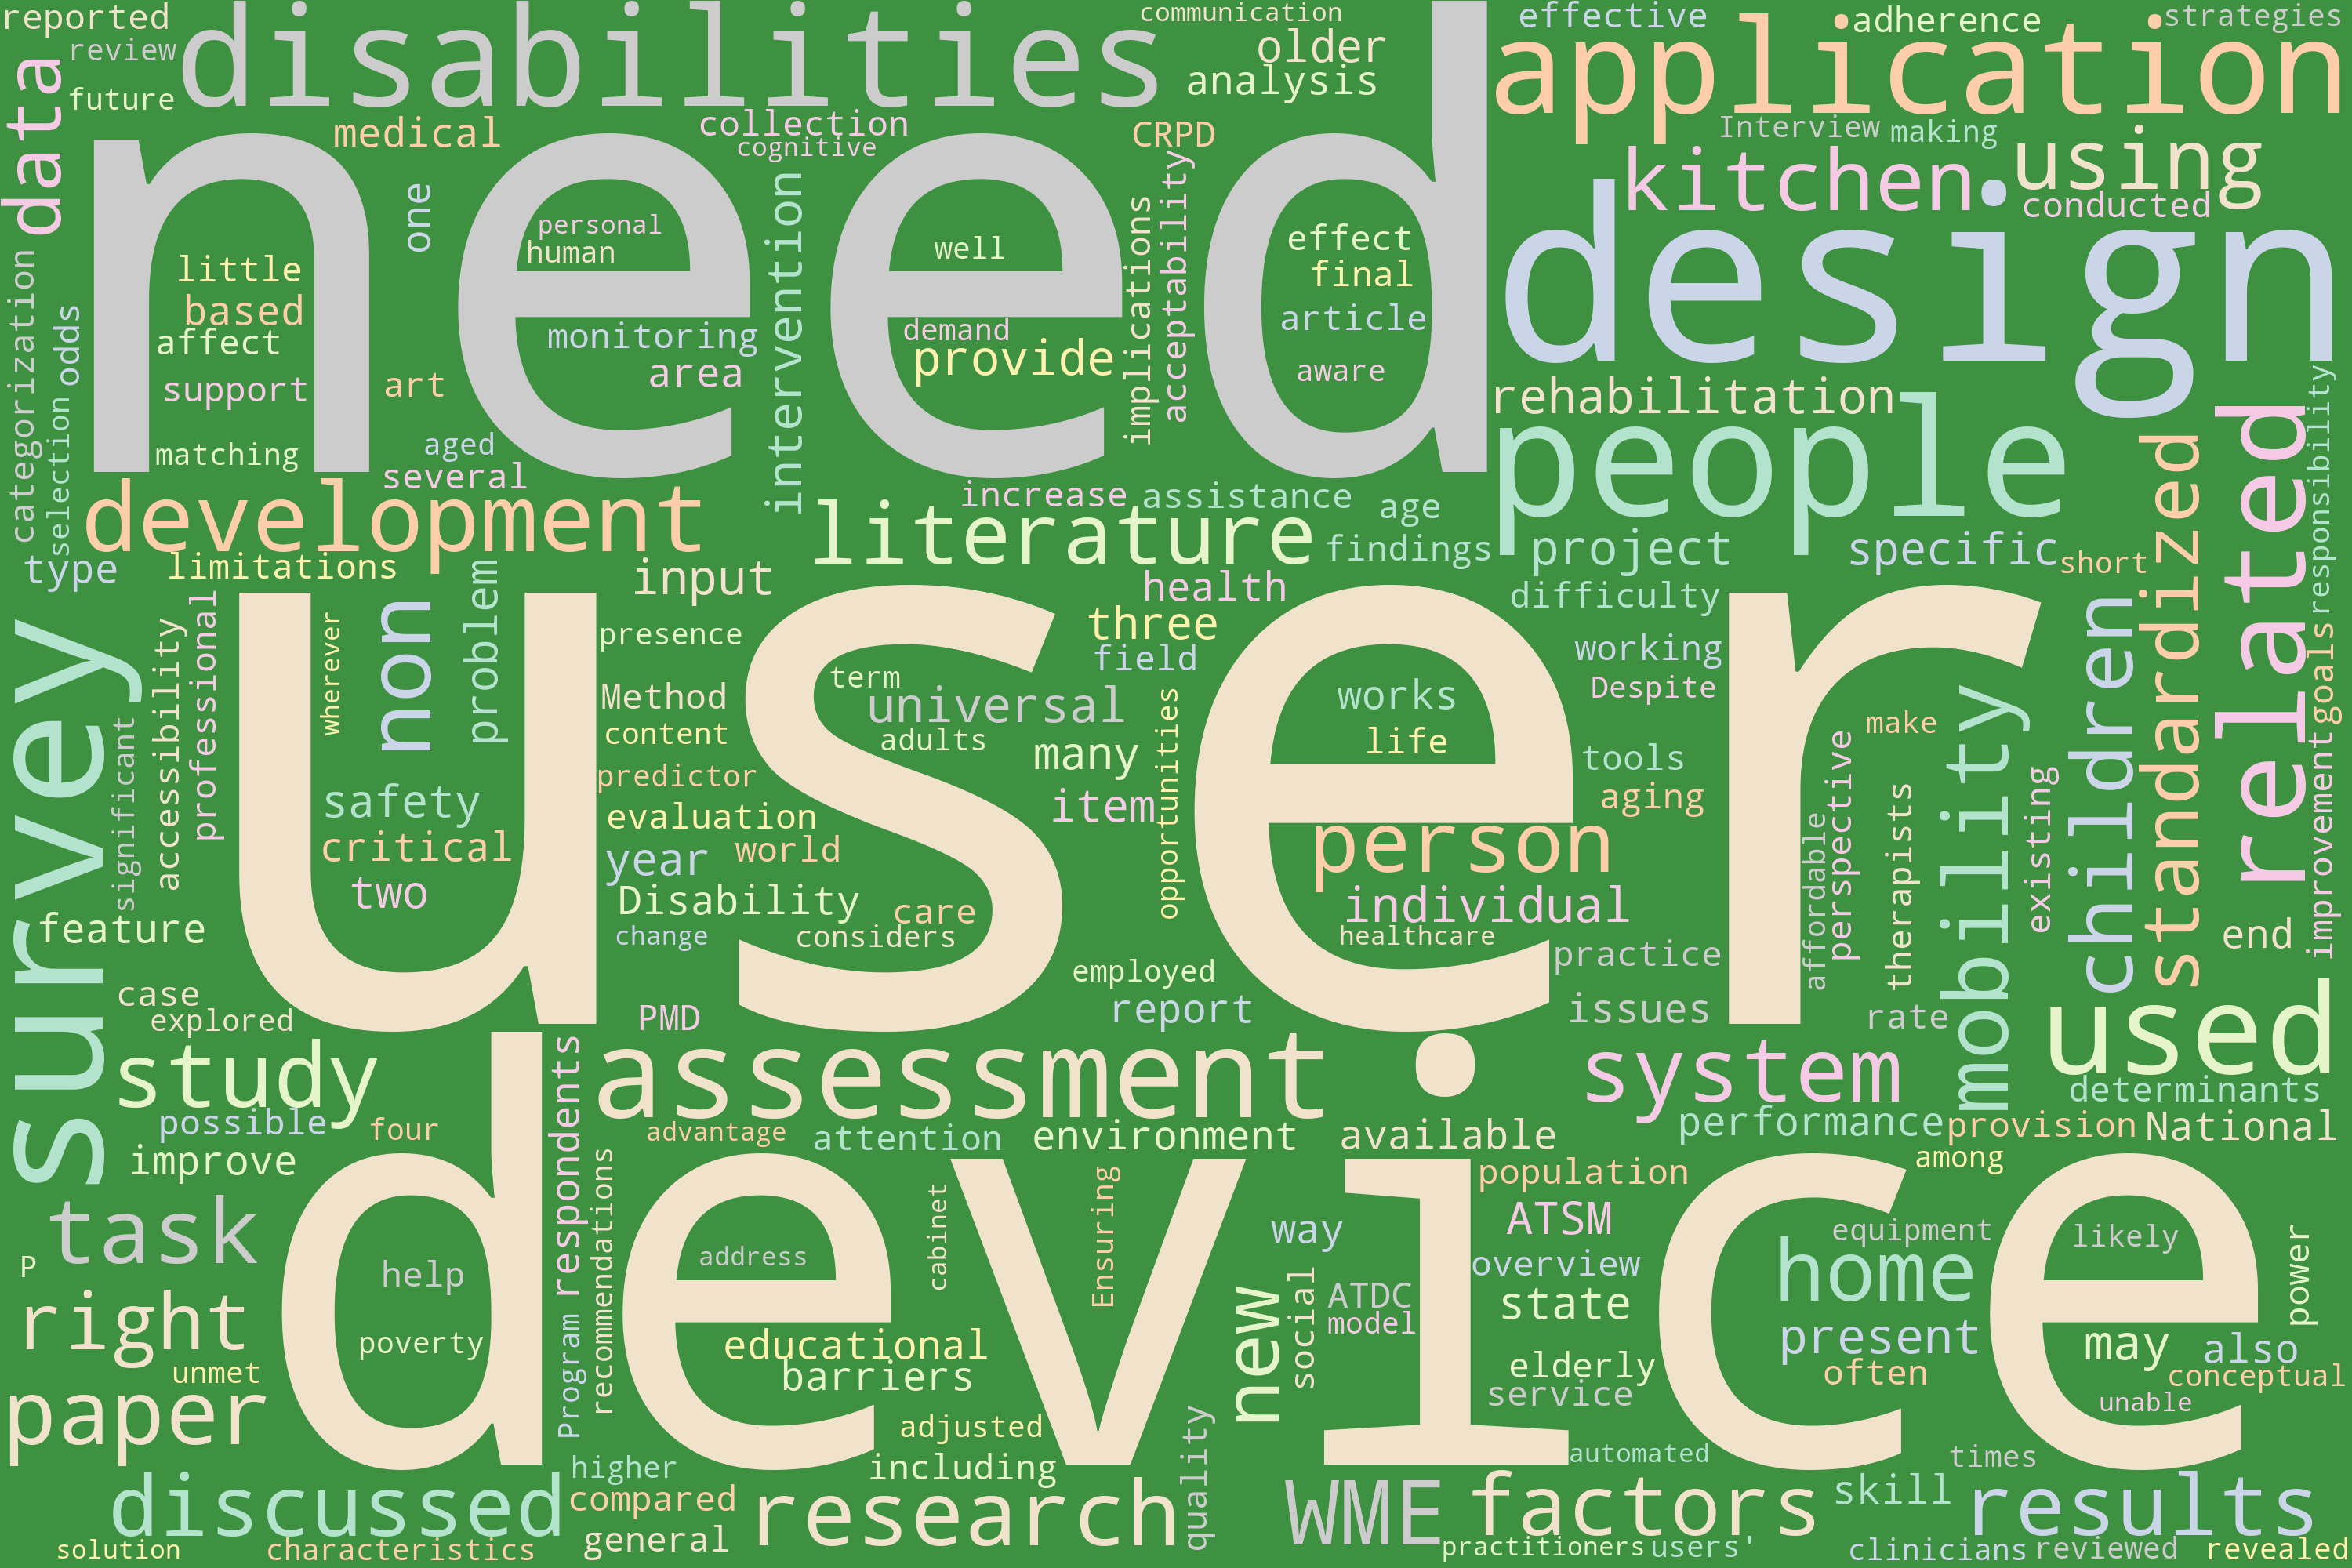

In [18]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

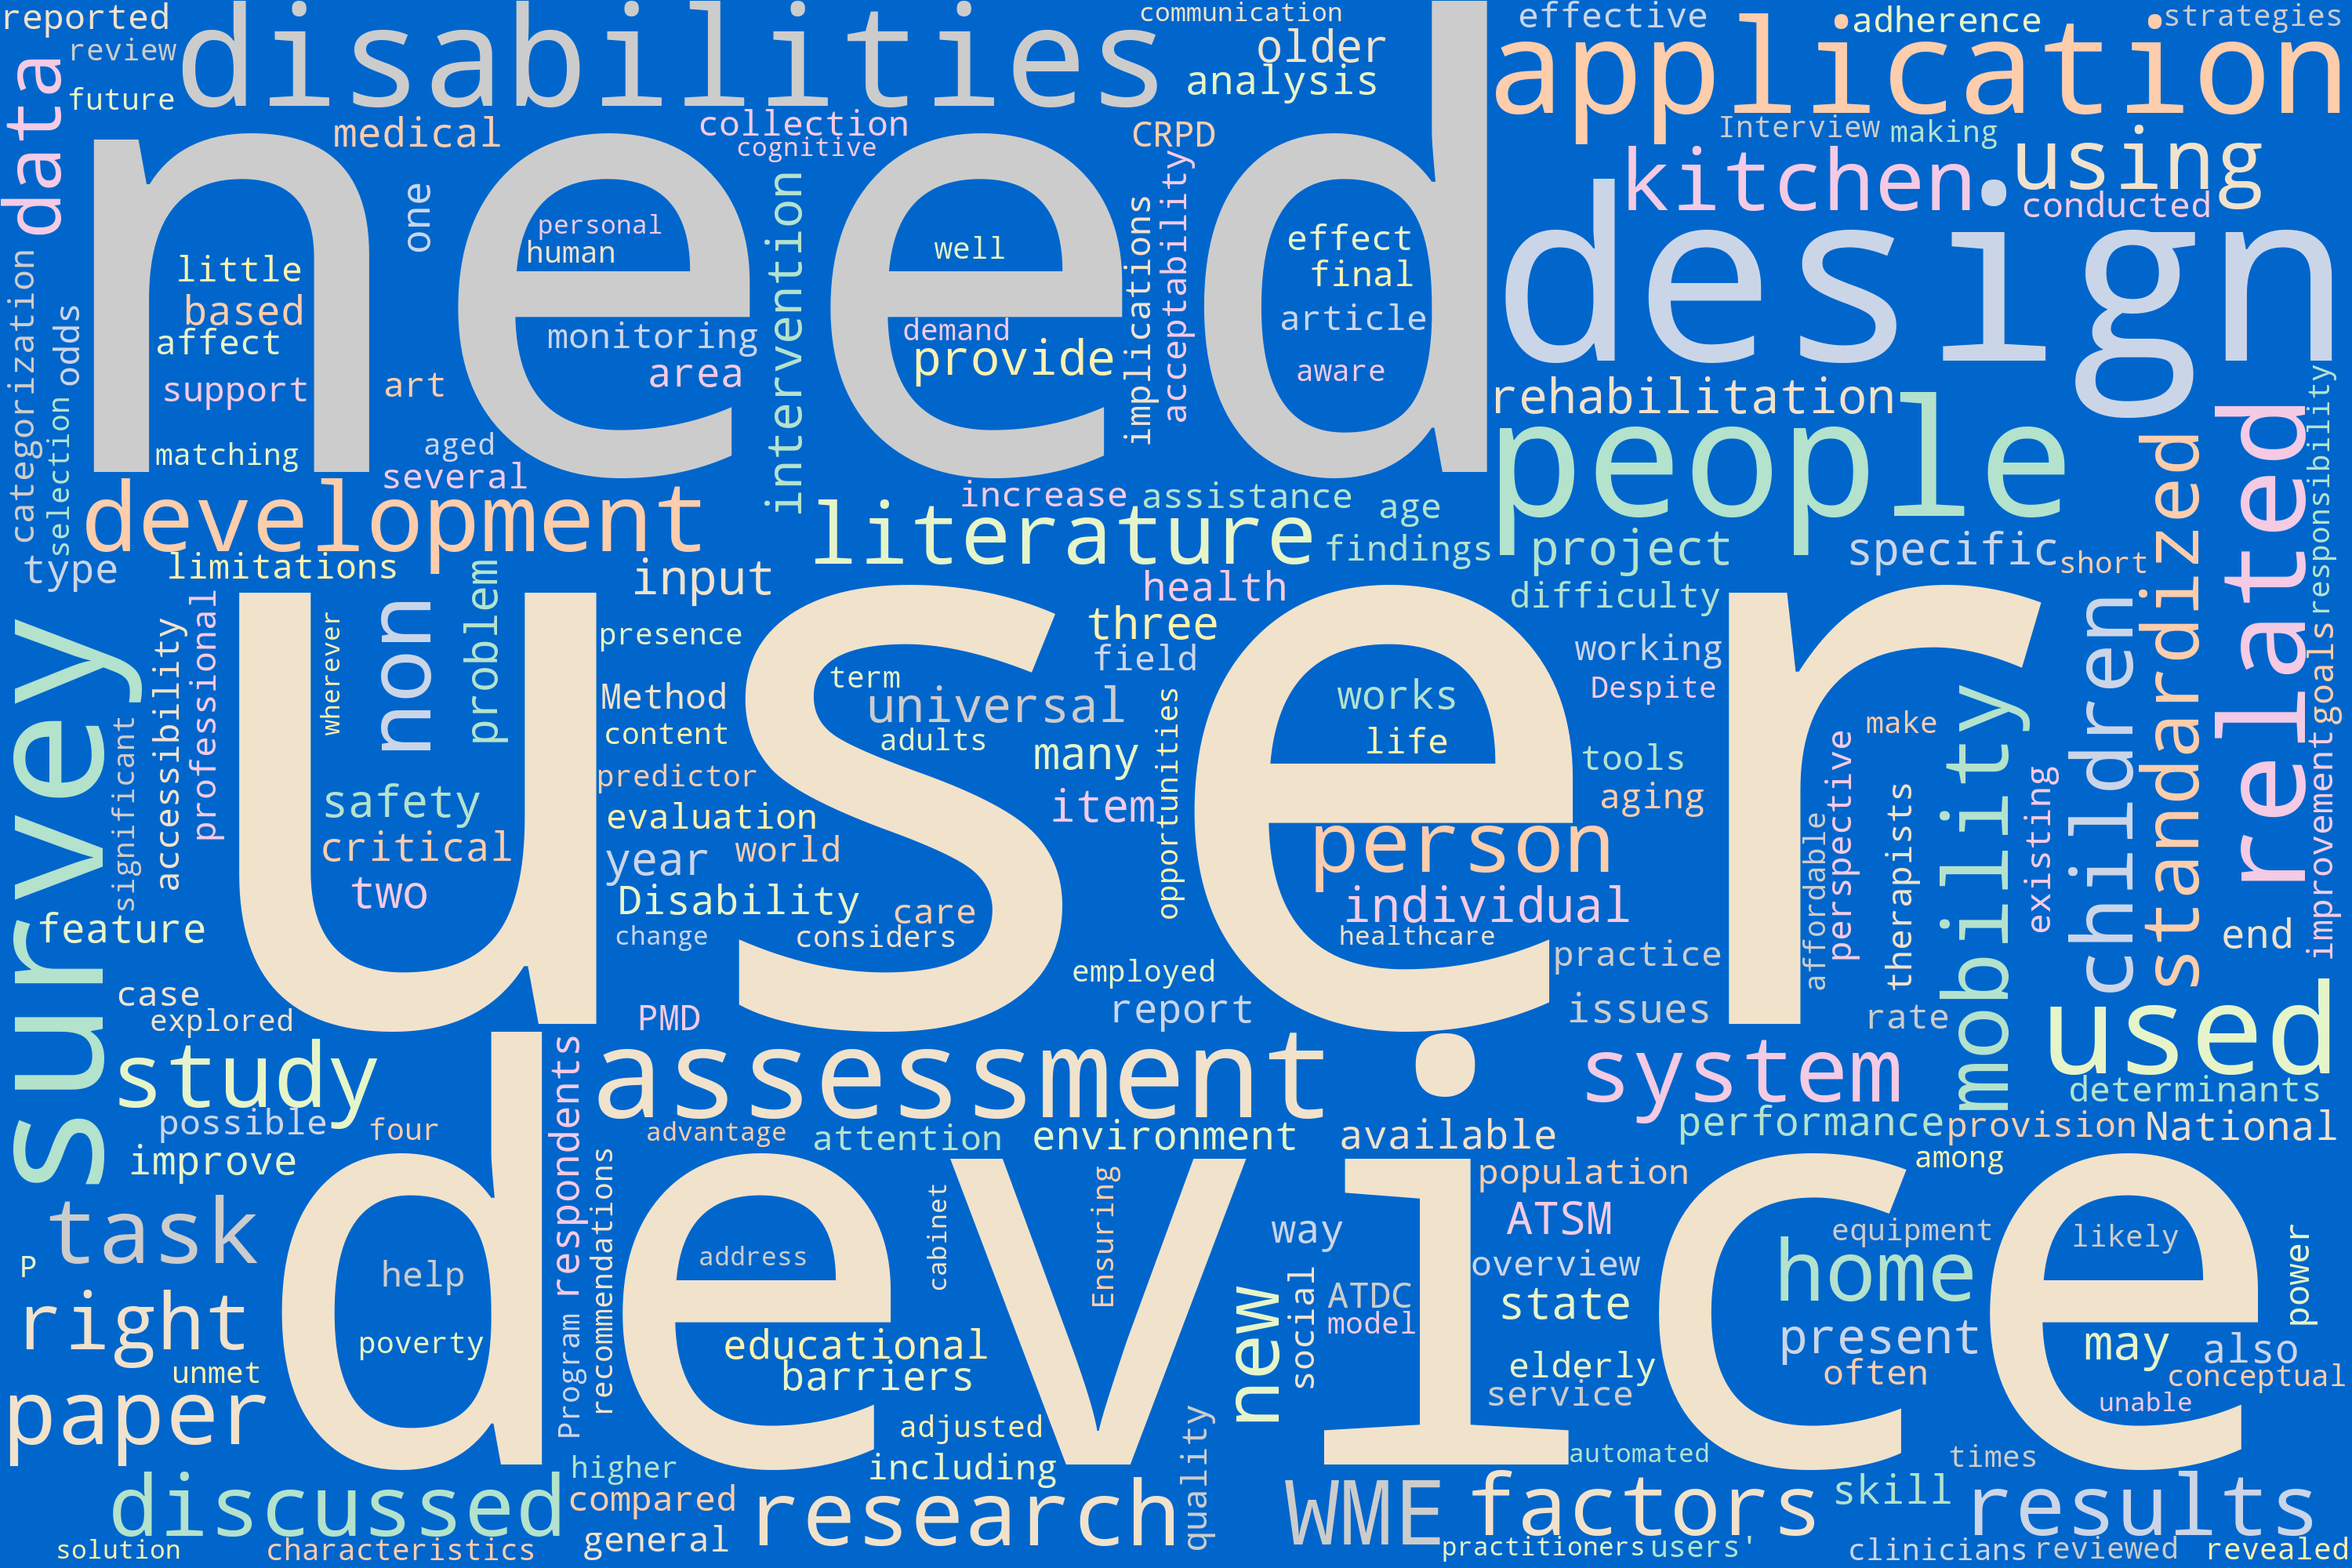

In [19]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [20]:
df.columns

Index(['Title', 'Abstract'], dtype='object')

In [21]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [22]:
df_Title  = df['Title'].str.lower()

In [23]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'assistive technology in elderly care  demographics and trends in wheeled mobility equipment use and accessibility in the community  the right to assistive technology  for whom, for what, and by whom   outcomes of assistive technology use on quality of life  factors associated with the use of standardized power mobility  universal design and assistive technology in communication and information technologies  alternatives or complements   the design of an interactive assistive kitchen system  managing input during assistive technology product design  assistive technology for individuals with disabilities  review and synthesis of the literature  integrating medical, assistive, and universal design products and technologies  assistive technology service method  atsm   survey of assistive technology applications in schools and recommendations for practice  assistive technology applications in educational programs of children with multiple disabilities  case study report on the state of the

In [24]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [25]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [26]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['assistive',
 'technology',
 'in',
 'elderly',
 'care',
 'demographic',
 'and',
 'trend',
 'in',
 'wheeled',
 'mobility',
 'equipment',
 'use',
 'and',
 'accessibility',
 'in',
 'the',
 'community',
 'the',
 'right',
 'to',
 'assistive',
 'technology',
 'for',
 'whom,',
 'for',
 'what,',
 'and',
 'by',
 'whom',
 'outcome',
 'of',
 'assistive',
 'technology',
 'use',
 'on',
 'quality',
 'of',
 'life',
 'factor',
 'associated',
 'with',
 'the',
 'use',
 'of',
 'standardized',
 'power',
 'mobility',
 'universal',
 'design',
 'and',
 'assistive',
 'technology',
 'in',
 'communication',
 'and',
 'information',
 'technology',
 'alternative',
 'or',
 'complement',
 'the',
 'design',
 'of',
 'an',
 'interactive',
 'assistive',
 'kitchen',
 'system',
 'managing',
 'input',
 'during',
 'assistive',
 'technology',
 'product',
 'design',
 'assistive',
 'technology',
 'for',
 'individual',
 'with',
 'disability',
 'review',
 'and',
 'synthesis',
 'of',
 'the',
 'literature',
 'integrating',
 'medi

In [30]:
stop_words = stopwords.words('english')
stop_words.extend([',','assistant','technology','technologies',':','A','on','in','into','the','for','.'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','assitant','assistive','How','technology','technologies','use']]
words_nsw

['elderly',
 'care',
 'demographic',
 'trend',
 'wheeled',
 'mobility',
 'equipment',
 'accessibility',
 'community',
 'right',
 'whom,',
 'what,',
 'outcome',
 'quality',
 'life',
 'factor',
 'associated',
 'standardized',
 'power',
 'mobility',
 'universal',
 'design',
 'communication',
 'information',
 'alternative',
 'complement',
 'design',
 'interactive',
 'kitchen',
 'system',
 'managing',
 'input',
 'product',
 'design',
 'individual',
 'disability',
 'review',
 'synthesis',
 'literature',
 'integrating',
 'medical,',
 'assistive,',
 'universal',
 'design',
 'product',
 'service',
 'method',
 'atsm',
 'survey',
 'application',
 'school',
 'recommendation',
 'practice',
 'application',
 'educational',
 'program',
 'child',
 'multiple',
 'disability',
 'case',
 'study',
 'report',
 'state',
 'practice',
 'acceptability',
 'older',
 'people',
 'computer',
 'vision',
 'surveying',
 'wearable',
 'human',
 'life',
 'safety',
 'critical',
 'application',
 'standards,',
 'challenge',
 

In [31]:
import collections

In [32]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [33]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0          (universal, design)       2
61           (state, practice)       1
59             (study, report)       1
58               (case, study)       1
57          (disability, case)       1
56      (multiple, disability)       1
55           (child, multiple)       1
54            (program, child)       1
53      (educational, program)       1
52  (application, educational)       1
51     (practice, application)       1
50  (recommendation, practice)       1
49    (school, recommendation)       1
48       (application, school)       1
47       (survey, application)       1
46              (atsm, survey)       1
45              (method, atsm)       1
44           (service, method)       1
43          (product, service)       1
60             (report, state)       1

In [34]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
       (universal, design) &       2 \\
         (state, practice) &       1 \\
           (study, report) &       1 \\
             (case, study) &       1 \\
        (disability, case) &       1 \\
    (multiple, disability) &       1 \\
         (child, multiple) &       1 \\
          (program, child) &       1 \\
    (educational, program) &       1 \\
(application, educational) &       1 \\
   (practice, application) &       1 \\
(recommendation, practice) &       1 \\
  (school, recommendation) &       1 \\
     (application, school) &       1 \\
     (survey, application) &       1 \\
            (atsm, survey) &       1 \\
            (method, atsm) &       1 \\
         (service, method) &       1 \\
        (product, service) &       1 \\
           (report, state) &       1 \\
 (practice, acceptability) &       1 \\
           (elderly, care) &       1 \\
    (acceptability, older) &       1 \\
  

In [35]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('universal', 'design')        |        2 |
| ('state', 'practice')          |        1 |
| ('study', 'report')            |        1 |
| ('case', 'study')              |        1 |
| ('disability', 'case')         |        1 |
| ('multiple', 'disability')     |        1 |
| ('child', 'multiple')          |        1 |
| ('program', 'child')           |        1 |
| ('educational', 'program')     |        1 |
| ('application', 'educational') |        1 |
| ('practice', 'application')    |        1 |
| ('recommendation', 'practice') |        1 |
| ('school', 'recommendation')   |        1 |
| ('application', 'school')      |        1 |
| ('survey', 'application')      |        1 |
| ('atsm', 'survey')             |        1 |
| ('method', 'atsm')             |        1 |
| ('service', 'method')          |        1 |
| ('product', 'service')         |        1 |
| ('report', 'state')            |

In [36]:
title_bigram.to_csv("title_bigram.csv")

In [37]:
import networkx as nx

In [38]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [39]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [40]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

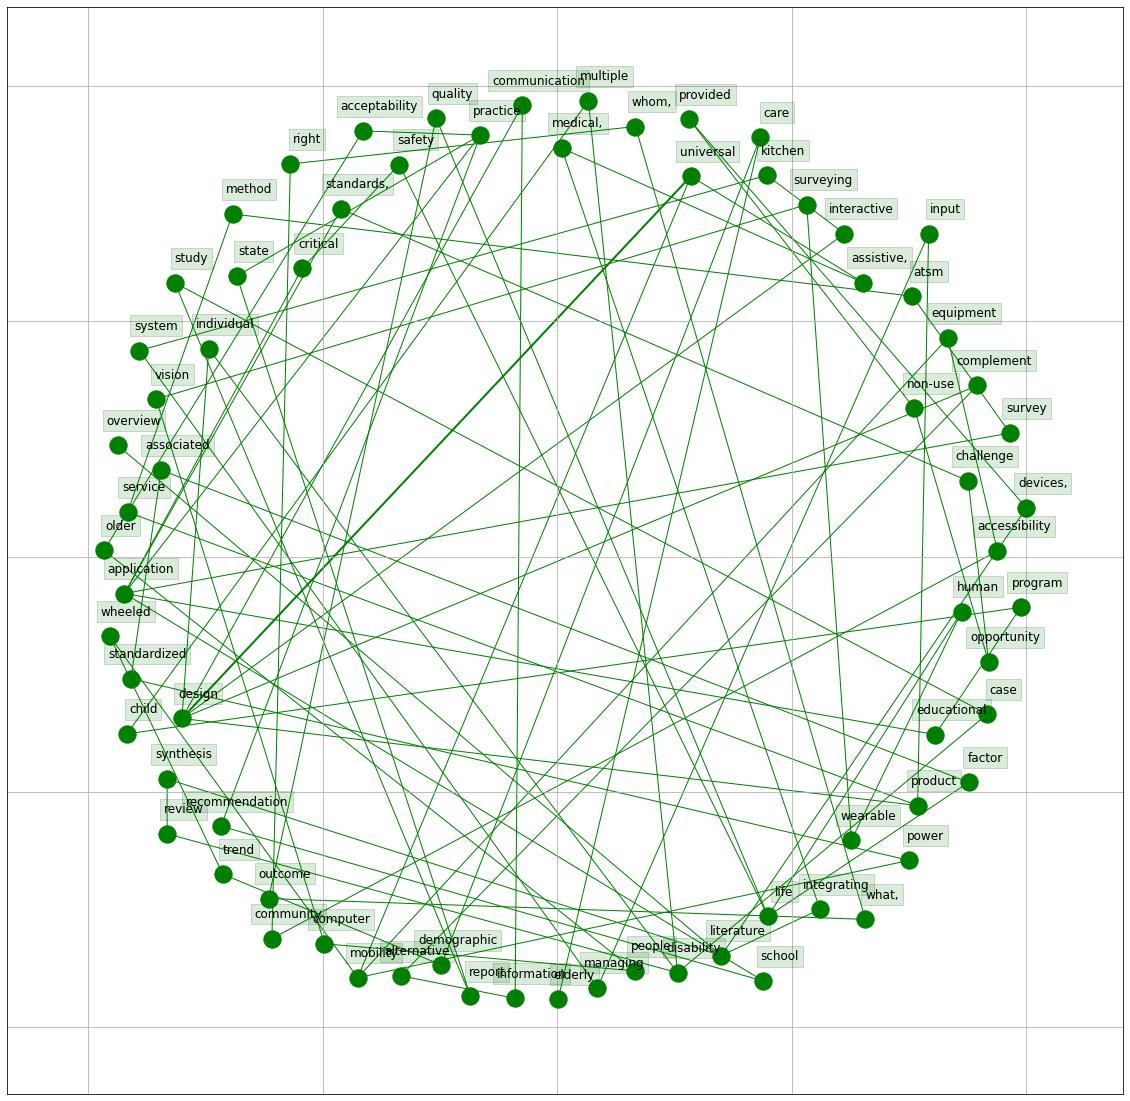

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [42]:
import igviz as ig

In [43]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [44]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-44-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [45]:
df_Abstract = df['Abstract'].str.lower()

In [46]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"new developments in assistive technology are likely to make an important contribution to the care of elderly people in institutions and at home  video‐monitoring  remote health monitoring  electronic sensors and equipment such as fall detectors  door monitors  bed alerts  pressure mats and smoke and heat alarms can improve older people's safety  security and ability to cope at home  care at home is often preferable to patients and is usually less expensive for care providers than institutional alternatives   this article presents profile of household-resident u s  adults using wheeled mobility equipment  wme  in trends in wme use from to and data on accessibility features and problems from data were obtained from the survey of income and program participation  sipp  and the national health interview survey on disability  nhis-d   compared to the general population  wme users are more likely to be older  female  and in poor health  forty-four percent are working-aged  with twice the ra

In [47]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [48]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [49]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['new',
 'development',
 'in',
 'assistive',
 'technology',
 'are',
 'likely',
 'to',
 'make',
 'an',
 'important',
 'contribution',
 'to',
 'the',
 'care',
 'of',
 'elderly',
 'people',
 'in',
 'institution',
 'and',
 'at',
 'home',
 'video‐monitoring',
 'remote',
 'health',
 'monitoring',
 'electronic',
 'sensor',
 'and',
 'equipment',
 'such',
 'a',
 'fall',
 'detector',
 'door',
 'monitor',
 'bed',
 'alert',
 'pressure',
 'mat',
 'and',
 'smoke',
 'and',
 'heat',
 'alarm',
 'can',
 'improve',
 'older',
 "people's",
 'safety',
 'security',
 'and',
 'ability',
 'to',
 'cope',
 'at',
 'home',
 'care',
 'at',
 'home',
 'is',
 'often',
 'preferable',
 'to',
 'patient',
 'and',
 'is',
 'usually',
 'le',
 'expensive',
 'for',
 'care',
 'provider',
 'than',
 'institutional',
 'alternative',
 'this',
 'article',
 'present',
 'profile',
 'of',
 'household-resident',
 'u',
 's',
 'adult',
 'using',
 'wheeled',
 'mobility',
 'equipment',
 'wme',
 'in',
 'trend',
 'in',
 'wme',
 'use',
 'from',

In [51]:
stop_words = stopwords.words('english')
stop_words.extend([',','assistive','technology','technologies',':','A','on','in','into','the','for','review','.'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','assistive','How','technology','technologies','e','g','drb','ha',]]
words_nsw

['new',
 'development',
 'likely',
 'make',
 'important',
 'contribution',
 'care',
 'elderly',
 'people',
 'institution',
 'home',
 'video‐monitoring',
 'remote',
 'health',
 'monitoring',
 'electronic',
 'sensor',
 'equipment',
 'fall',
 'detector',
 'door',
 'monitor',
 'bed',
 'alert',
 'pressure',
 'mat',
 'smoke',
 'heat',
 'alarm',
 'improve',
 'older',
 "people's",
 'safety',
 'security',
 'ability',
 'cope',
 'home',
 'care',
 'home',
 'often',
 'preferable',
 'patient',
 'usually',
 'le',
 'expensive',
 'care',
 'provider',
 'institutional',
 'alternative',
 'article',
 'present',
 'profile',
 'household-resident',
 'u',
 'adult',
 'using',
 'wheeled',
 'mobility',
 'equipment',
 'wme',
 'trend',
 'wme',
 'use',
 'data',
 'accessibility',
 'feature',
 'problem',
 'data',
 'obtained',
 'survey',
 'income',
 'program',
 'participation',
 'sipp',
 'national',
 'health',
 'interview',
 'survey',
 'disability',
 'nhis-d',
 'compared',
 'general',
 'population',
 'wme',
 'user',
 '

In [52]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [53]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0             (universal, design)       5
1            (people, disability)       4
7               (mobility, skill)       3
11              (factor, related)       3
9               (kitchen, system)       3
8             (skill, assessment)       3
10        (medical, intervention)       3
6               (power, mobility)       3
5      (standardized, assessment)       3
4            (person, disability)       3
3              (data, collection)       3
2                      (wme, use)       3
41              (child, multiple)       2
33              (design, process)       2
34                  (project, wa)       2
35                  (type, input)       2
36  (organizational, performance)       2
38                   (atsm, atdc)       2
39                (atac, project)       2
40              (practice, field)       2
47        (overview, determinant)       2
42         (multiple, disability)       2
43                   (state, art)       2
44               (oriented”, way)       2
45             (computer, vision)       2

In [54]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                       bigram &  counts \\
\midrule
          (universal, design) &       5 \\
         (people, disability) &       4 \\
            (mobility, skill) &       3 \\
            (factor, related) &       3 \\
            (kitchen, system) &       3 \\
          (skill, assessment) &       3 \\
      (medical, intervention) &       3 \\
            (power, mobility) &       3 \\
   (standardized, assessment) &       3 \\
         (person, disability) &       3 \\
           (data, collection) &       3 \\
                   (wme, use) &       3 \\
            (child, multiple) &       2 \\
            (design, process) &       2 \\
                (project, wa) &       2 \\
                (type, input) &       2 \\
(organizational, performance) &       2 \\
                 (atsm, atdc) &       2 \\
              (atac, project) &       2 \\
            (practice, field) &       2 \\
      (overview, determinant) &       2 \\
       (multiple

In [ ]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                       |   counts |
|:-----------------------------|---------:|
| ('assistive', 'device')      |        7 |
| ('assistive', 'use')         |        6 |
| ('people', 'disability')     |        5 |
| ('disability', 'study')      |        5 |
| ('person', 'disability')     |        3 |
| ('use', 'assistive')         |        3 |
| ('medical', 'intervention')  |        3 |
| ('factor', 'related')        |        3 |
| ('child', 'multiple')        |        2 |
| ('field', 'assistive')       |        2 |
| ('assistive', 'design')      |        2 |
| ('adoption', 'process')      |        2 |
| ('us', 'assistive')          |        2 |
| ('assistive', 'field')       |        2 |
| ('access', 'people')         |        2 |
| ('atac', 'project')          |        2 |
| ('application', 'assistive') |        2 |
| ('computer', 'vision')       |        2 |
| ('multiple', 'disability')   |        2 |
| ('state', 'art')             |        2 |
| ('oriented”', 'way')         |

In [55]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [56]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [57]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

In [58]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [59]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [60]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-60-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

